# Import data

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

#Untuk mengabaikan fitur peringatan 
import warnings
warnings.filterwarnings('ignore')


# Data Loading

In [2]:
data = pd.read_csv('ecommerce_data_clean.csv')

In [3]:
data

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales,quantity,discount,...,shipping_cost,order_priority,customer_id,customer_name,segment,city,state,country,region,months
0,AU-2015-1,2015-11-09,2015-11-17,8,First Class,Auto & Accessories,Car Media Players,140,2,5,...,4,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
1,AU-2015-2,2015-06-30,2015-07-02,2,First Class,Auto & Accessories,Car Speakers,211,3,3,...,11,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
2,AU-2015-3,2015-12-05,2015-12-13,8,First Class,Auto & Accessories,Car Body Covers,117,5,1,...,3,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec
3,AU-2015-4,2015-05-09,2015-05-16,7,First Class,Auto & Accessories,Car & Bike Care,118,2,5,...,2,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May
4,AU-2015-5,2015-07-09,2015-07-18,9,First Class,Auto & Accessories,Tyre,250,1,4,...,16,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51273,FA-2015-30771,2015-01-21,2015-01-27,6,Standard Class,Fashion,Sports Wear,85,5,4,...,1,Medium,IN-0040977,Welch Fein,Corporate,Pasadena,Texas,United States,Central,Jan
51274,FA-2015-30772,2015-06-22,2015-06-24,2,Standard Class,Fashion,Sports Wear,85,1,3,...,0,Medium,TT-0040978,Martinez Arnett,Corporate,Harare,Harare,Zimbabwe,Africa,Jun
51275,FA-2015-30773,2015-01-01,2015-01-07,6,Standard Class,Fashion,Sports Wear,85,1,5,...,0,Medium,ON-0040979,Mccoy Duston,Home Office,Townsville,Queensland,Australia,Oceania,Jan
51276,FA-2015-30774,2015-12-07,2015-12-14,7,Standard Class,Fashion,Sports Wear,85,3,4,...,2,Medium,RN-0040980,Bentley Zypern,Consumer,Houston,Texas,United States,Central,Dec


In [4]:
data.head().T

,0,1,2,3,4
order_id,AU-2015-1,AU-2015-2,AU-2015-3,AU-2015-4,AU-2015-5
order_date,2015-11-09,2015-06-30,2015-12-05,2015-05-09,2015-07-09
ship_date,2015-11-17,2015-07-02,2015-12-13,2015-05-16,2015-07-18
aging,8,2,8,7,9
ship_mode,First Class,First Class,First Class,First Class,First Class
product_category,Auto & Accessories,Auto & Accessories,Auto & Accessories,Auto & Accessories,Auto & Accessories
product,Car Media Players,Car Speakers,Car Body Covers,Car & Bike Care,Tyre
sales,140,211,117,118,250
quantity,2,3,5,2,1
discount,5,3,1,5,4


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51278 entries, 0 to 51277
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_id          51278 non-null  object
 1   order_date        51278 non-null  object
 2   ship_date         51278 non-null  object
 3   aging             51278 non-null  int64 
 4   ship_mode         51278 non-null  object
 5   product_category  51278 non-null  object
 6   product           51278 non-null  object
 7   sales             51278 non-null  int64 
 8   quantity          51278 non-null  int64 
 9   discount          51278 non-null  int64 
 10  profit            51278 non-null  int64 
 11  shipping_cost     51278 non-null  int64 
 12  order_priority    51278 non-null  object
 13  customer_id       51278 non-null  object
 14  customer_name     51278 non-null  object
 15  segment           51278 non-null  object
 16  city              51278 non-null  object
 17  state       

In [6]:
data['ship_mode'].value_counts()

ship_mode
Standard Class    30775
Second Class      10309
First Class        7492
Same Day           2701
45788                 1
Name: count, dtype: int64

In [7]:
data = data[data['ship_mode'] != '45788']

# cardinality

In [8]:
# Select only non-numeric columns for Cramér's V calculation
categorical_data = data.select_dtypes(exclude=['float64', 'int64'])

In [9]:
categorical_data.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'product_category',
       'product', 'order_priority', 'customer_id', 'customer_name', 'segment',
       'city', 'state', 'country', 'region', 'months'],
      dtype='object')

In [10]:
# Count unique values in each categorical column
unique_counts = categorical_data.nunique()

unique_counts

order_id            51277
order_date            365
ship_date             375
ship_mode               4
product_category        4
product                42
order_priority          4
customer_id         51277
customer_name         795
segment                 3
city                 3636
state                1094
country               147
region                 15
months                 12
dtype: int64

In [11]:
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    """Compute Cramér's V statistic for categorical-categorical association."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

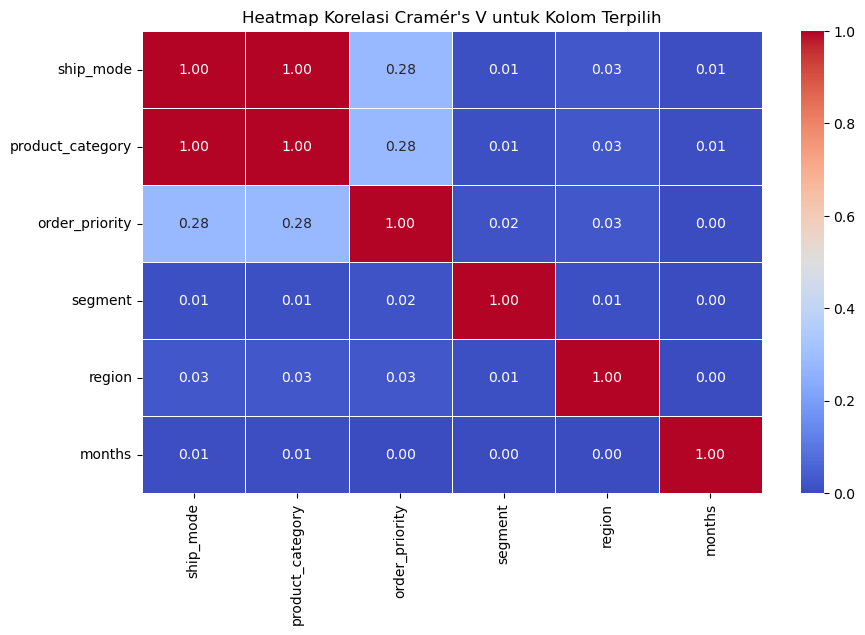

In [12]:
# Select columns with fewer unique categories
selected_columns = ['ship_mode', 'product_category', 'order_priority', 'segment', 'region', 'months']
selected_data = categorical_data[selected_columns]

# Calculate Cramér's V correlation matrix for the selected columns
cramers_v_selected_matrix = pd.DataFrame(index=selected_data.columns, columns=selected_data.columns)
for col1 in selected_data.columns:
    for col2 in selected_data.columns:
        cramers_v_selected_matrix.loc[col1, col2] = cramers_v(selected_data[col1], selected_data[col2])

cramers_v_selected_matrix = cramers_v_selected_matrix.astype(float)

# Plot the heatmap for Cramér's V correlation for the selected columns
plt.figure(figsize=(10, 6))
sns.heatmap(cramers_v_selected_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Cramér's V untuk Kolom Terpilih")
plt.show()


In [52]:
# Select only non-numeric columns for Cramér's V calculation
numerical_data = data.select_dtypes(exclude=['object'])

In [14]:
numerical_data.columns

Index(['aging', 'sales', 'quantity', 'discount', 'profit', 'shipping_cost'], dtype='object')

In [15]:
import scipy.stats as stats

# List of numerical columns to check
numerical_cols = ['aging', 'sales', 'quantity', 'discount', 'profit', 'shipping_cost']

# Calculate F-values and p-values for each numerical column based on product_category
f_values = {}
p_values = {}
for col in numerical_cols:
    model = stats.f_oneway(*(data[col][data['order_priority'] == cat] for cat in data['order_priority'].unique()))
    f_values[col] = model.statistic
    p_values[col] = model.pvalue

# Convert the F-values and p-values to a DataFrame for visualization
f_values_df = pd.DataFrame(f_values, index=['F-value']).T
p_values_df = pd.DataFrame(p_values, index=['p-value']).T

combined_df = pd.concat([f_values_df, p_values_df], axis=1)
combined_df


,F-value,p-value
aging,68.128578,5.818923e-44
sales,194.548552,1.828790e-125
quantity,0.845723,4.686183e-01
discount,2.495335,5.793134e-02
profit,142.131847,1.019372e-91
shipping_cost,149.051743,3.537445e-96


Terlihat bahwa kolom quality dan discount tidak mempunyai hubungan dengan product category

- sales: 0.1053
- shipping_cost: 0.0918
- profit: 0.0896
- aging: 0.0597
- discount: 0.0029
- quantity:

In [16]:
data_select = data[['order_priority','aging','sales','profit','shipping_cost','quantity','discount']]
data_select.head()

,order_priority,aging,sales,profit,shipping_cost,quantity,discount
0,Medium,8,140,46,4,2,5
1,Medium,2,211,112,11,3,3
2,Critical,8,117,31,3,5,1
3,High,7,118,26,2,2,5
4,Critical,9,250,160,16,1,4


# Feature Engineering

In [17]:
# Splitting between `X` and `y`

X = data_select.drop(['order_priority'], axis=1)
y = data_select['order_priority']
X

,aging,sales,profit,shipping_cost,quantity,discount
0,8,140,46,4,2,5
1,2,211,112,11,3,3
2,8,117,31,3,5,1
3,7,118,26,2,2,5
4,9,250,160,16,1,4
...,...,...,...,...,...,...
51273,6,85,17,1,5,4
51274,2,85,2,0,1,3
51275,6,85,0,0,1,5
51276,7,85,28,2,3,4


In [18]:
# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10,stratify=y)

print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)

Train size :  (35893, 6)
Test size  :  (15384, 6)


# Encoding

In [19]:
# Untuk melakukan preprocessing fitur transformasi
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder,MinMaxScaler

In [20]:
# One hot Encoding
cat_ohe= ['segment','region','product_category']
encoder= OneHotEncoder(sparse=False) #array

encoder.fit(X_train[cat_ohe])
X_train_ohe= encoder.transform(X_train[cat_ohe])
X_test_ohe= encoder.transform(X_test[cat_ohe])

In [21]:
# X_train_ohe

In [22]:
# # Ordinal encoder
# cat_ordinal= ['ship_mode']
# # Assuming a specific order for the columns
# order_ship_mode = ['Same Day', 'First Class', 'Second Class', 'Standard Class']

# # Initialize the encoder with the correct ordering
# ordinal = OrdinalEncoder(categories=[order_ship_mode])

# # Assuming X_train and X_test are defined and split correctly
# # Fit and transform on the training data
# X_train_ordinal = ordinal.fit_transform(X_train[cat_ordinal])

# # Transform the test data
# X_test_ordinal = ordinal.transform(X_test[cat_ordinal])

In [23]:
# X_train_ordinal

# Scaling

In [24]:
# num_col = ['aging','sales','profit','shipping_cost']
X_train.skew()

aging            0.062977
sales           -0.158863
profit           0.173682
shipping_cost    0.176151
quantity         0.004183
discount         0.005586
dtype: float64

In [25]:
X_test.skew()

aging            0.071171
sales           -0.155334
profit           0.183872
shipping_cost    0.187696
quantity        -0.007902
discount        -0.006114
dtype: float64

Distribusi normal

In [26]:
# Initialize the scaler
scaler = MinMaxScaler()

# Apply the scaler to the specified columns
X_train_scaling = scaler.fit_transform(X_train)
X_test_scaling = scaler.transform(X_test)

In [27]:
X_train_scaling

array([[0.66666667, 0.85253456, 0.77245509, 0.75      , 0.25      ,
        0.25      ],
       [0.11111111, 0.75115207, 0.51497006, 0.5       , 1.        ,
        0.5       ],
       [0.88888889, 0.13364055, 0.07185629, 0.0625    , 1.        ,
        0.5       ],
       ...,
       [0.66666667, 0.85253456, 0.49700599, 0.5       , 1.        ,
        1.        ],
       [0.66666667, 0.82949309, 0.76646707, 0.75      , 0.25      ,
        0.        ],
       [0.22222222, 0.75115207, 0.67065868, 0.6875    , 0.        ,
        0.25      ]])

# Encoding target

In [28]:
# Feature Encoding - Target
le = LabelEncoder()
le.fit(y_train)

y_train_encoded = le.transform(y_train)
y_test_encoded = le.transform(y_test)
y_train_encoded

array([2, 3, 2, ..., 3, 3, 1])

# Combine transformation

In [29]:
# X_train_combined = np.concatenate([X_train_ohe, X_train_ordinal, X_train_scaling], axis=1)
# X_test_combined = np.concatenate([X_test_ohe, X_test_ordinal, X_test_scaling], axis=1)

In [30]:
X_train_combined = X_train_scaling
X_train_combined

array([[0.66666667, 0.85253456, 0.77245509, 0.75      , 0.25      ,
        0.25      ],
       [0.11111111, 0.75115207, 0.51497006, 0.5       , 1.        ,
        0.5       ],
       [0.88888889, 0.13364055, 0.07185629, 0.0625    , 1.        ,
        0.5       ],
       ...,
       [0.66666667, 0.85253456, 0.49700599, 0.5       , 1.        ,
        1.        ],
       [0.66666667, 0.82949309, 0.76646707, 0.75      , 0.25      ,
        0.        ],
       [0.22222222, 0.75115207, 0.67065868, 0.6875    , 0.        ,
        0.25      ]])

In [31]:
X_test_combined = X_test_scaling
X_test_combined

array([[0.66666667, 0.38709677, 0.18562874, 0.1875    , 0.        ,
        1.        ],
       [0.66666667, 0.35023041, 0.08982036, 0.0625    , 0.75      ,
        0.5       ],
       [0.        , 0.87096774, 0.77844311, 0.8125    , 0.        ,
        1.        ],
       ...,
       [0.77777778, 0.88018433, 0.59281437, 0.5625    , 0.75      ,
        1.        ],
       [0.66666667, 0.75115207, 0.5988024 , 0.625     , 0.25      ,
        0.75      ],
       [0.11111111, 0.75115207, 0.5748503 , 0.5625    , 1.        ,
        0.25      ]])

In [32]:
# Save the Class Names into a Variable

classes = le.classes_
classes

array(['Critical', 'High', 'Low', 'Medium'], dtype=object)

In [33]:
y_train.value_counts()

order_priority
Medium      20600
High        10848
Critical     2748
Low          1697
Name: count, dtype: int64

In [34]:
X_train_combined

array([[0.66666667, 0.85253456, 0.77245509, 0.75      , 0.25      ,
        0.25      ],
       [0.11111111, 0.75115207, 0.51497006, 0.5       , 1.        ,
        0.5       ],
       [0.88888889, 0.13364055, 0.07185629, 0.0625    , 1.        ,
        0.5       ],
       ...,
       [0.66666667, 0.85253456, 0.49700599, 0.5       , 1.        ,
        1.        ],
       [0.66666667, 0.82949309, 0.76646707, 0.75      , 0.25      ,
        0.        ],
       [0.22222222, 0.75115207, 0.67065868, 0.6875    , 0.        ,
        0.25      ]])

# Model Training (Baseline)

In [35]:
# Training using Decision Tree
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_combined, y_train_encoded)


DecisionTreeClassifier()

In [36]:
model_dt.feature_importances_

array([0.29446178, 0.30750616, 0.14202741, 0.03668255, 0.09263343,
       0.12668868])

In [37]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
model_knn = KNeighborsClassifier()  # You can specify the number of neighbors (e.g., 5) as needed

# Fit the KNN model to your training data
model_knn.fit(X_train_combined, y_train_encoded)


KNeighborsClassifier()

In [38]:
# from sklearn.svm import SVC

# # Create an SVM classifier
# model_svm = SVC()  # You can choose different kernel functions (e.g., 'linear', 'rbf', 'poly', etc.)

# # Fit the SVM model to your training data
# model_svm.fit(X_train_combined, y_train_encoded)


In [39]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
model_rf = RandomForestClassifier()  # You can adjust the number of trees (n_estimators) as needed

# Fit the Random Forest model to your training data
model_rf.fit(X_train_combined, y_train_encoded)

RandomForestClassifier()

In [40]:
from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoost classifier
model_adaboost = AdaBoostClassifier() 
# You can specify the base estimator (e.g., DecisionTreeClassifier) and adjust the number of estimators (n_estimators) as needed

# Fit the AdaBoost model to your training data
model_adaboost.fit(X_train_combined, y_train_encoded)


AdaBoostClassifier()

# Model Evaluation (Baseline)

Decision Tree - Train


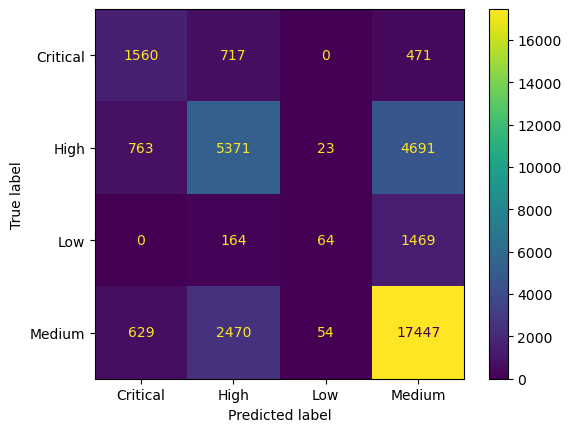

              precision    recall  f1-score   support

    Critical       0.53      0.57      0.55      2748
        High       0.62      0.50      0.55     10848
         Low       0.45      0.04      0.07      1697
      Medium       0.72      0.85      0.78     20600

    accuracy                           0.68     35893
   macro avg       0.58      0.49      0.49     35893
weighted avg       0.66      0.68      0.66     35893


Decision Tree - Test


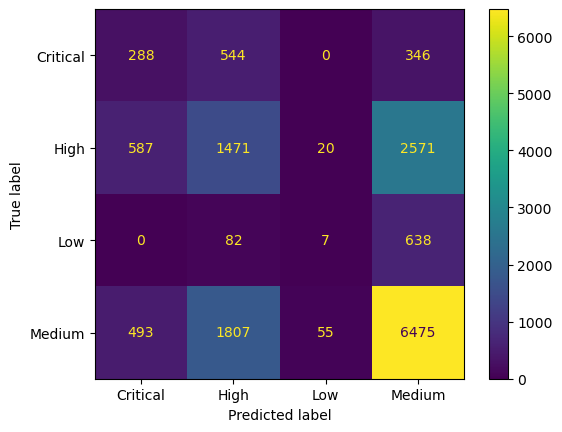

              precision    recall  f1-score   support

    Critical       0.21      0.24      0.23      1178
        High       0.38      0.32      0.34      4649
         Low       0.09      0.01      0.02       727
      Medium       0.65      0.73      0.69      8830

    accuracy                           0.54     15384
   macro avg       0.33      0.33      0.32     15384
weighted avg       0.50      0.54      0.52     15384



In [41]:
# Model Evaluation

def performance_check(clf, X, y, classes):
  y_pred = clf.predict(X)
  cm = confusion_matrix(y, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
  disp.plot()
  plt.show()
  print(classification_report(y, y_pred, target_names=classes))

print('Decision Tree - Train')
performance_check(model_dt, X_train_combined, y_train_encoded, classes)
print('')

print('Decision Tree - Test')
performance_check(model_dt, X_test_combined, y_test_encoded, classes)

Decision Tree - Train


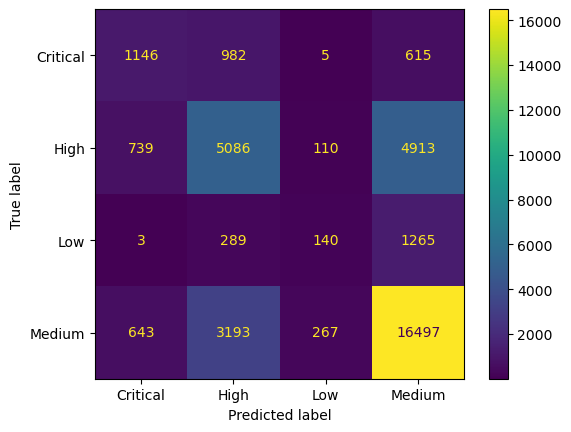

              precision    recall  f1-score   support

    Critical       0.45      0.42      0.43      2748
        High       0.53      0.47      0.50     10848
         Low       0.27      0.08      0.13      1697
      Medium       0.71      0.80      0.75     20600

    accuracy                           0.64     35893
   macro avg       0.49      0.44      0.45     35893
weighted avg       0.61      0.64      0.62     35893


Decision Tree - Test


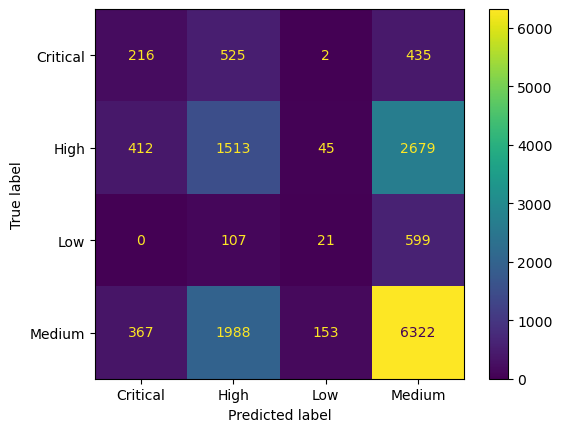

              precision    recall  f1-score   support

    Critical       0.22      0.18      0.20      1178
        High       0.37      0.33      0.34      4649
         Low       0.10      0.03      0.04       727
      Medium       0.63      0.72      0.67      8830

    accuracy                           0.52     15384
   macro avg       0.33      0.31      0.31     15384
weighted avg       0.49      0.52      0.51     15384



In [42]:
# Model Evaluation

print('Decision Tree - Train')
performance_check(model_knn, X_train_combined, y_train_encoded, classes)
print('')

print('Decision Tree - Test')
performance_check(model_knn, X_test_combined, y_test_encoded, classes)

In [43]:
# # Model Evaluation

# print('Decision Tree - Train')
# performance_check(model_svm, X_train_combined, y_train_encoded, classes)
# print('')

# print('Decision Tree - Test')
# performance_check(model_svm, X_test_combined, y_test_encoded, classes)

Decision Tree - Train


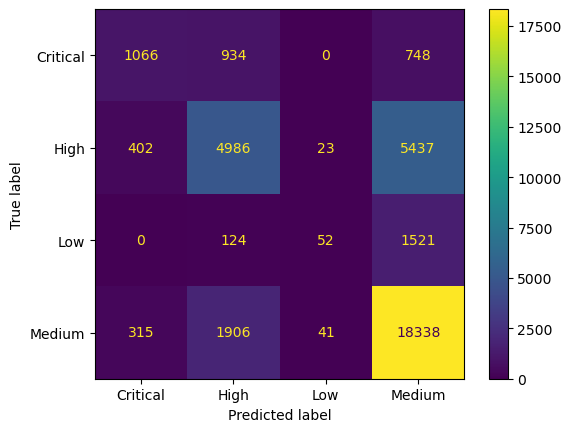

              precision    recall  f1-score   support

    Critical       0.60      0.39      0.47      2748
        High       0.63      0.46      0.53     10848
         Low       0.45      0.03      0.06      1697
      Medium       0.70      0.89      0.79     20600

    accuracy                           0.68     35893
   macro avg       0.59      0.44      0.46     35893
weighted avg       0.66      0.68      0.65     35893


Decision Tree - Test


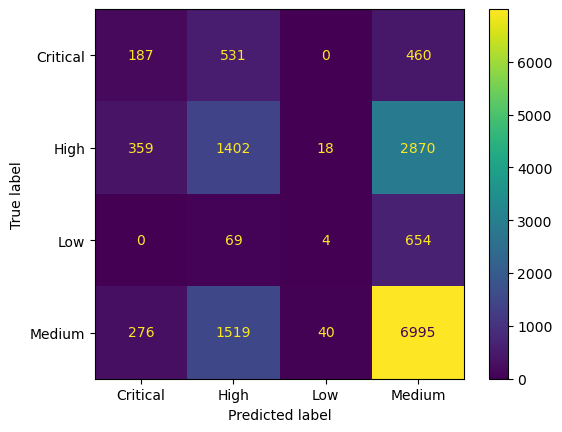

              precision    recall  f1-score   support

    Critical       0.23      0.16      0.19      1178
        High       0.40      0.30      0.34      4649
         Low       0.06      0.01      0.01       727
      Medium       0.64      0.79      0.71      8830

    accuracy                           0.56     15384
   macro avg       0.33      0.31      0.31     15384
weighted avg       0.51      0.56      0.52     15384



In [44]:
# Model Evaluation

print('Decision Tree - Train')
performance_check(model_rf, X_train_combined, y_train_encoded, classes)
print('')

print('Decision Tree - Test')
performance_check(model_rf, X_test_combined, y_test_encoded, classes)

Decision Tree - Train


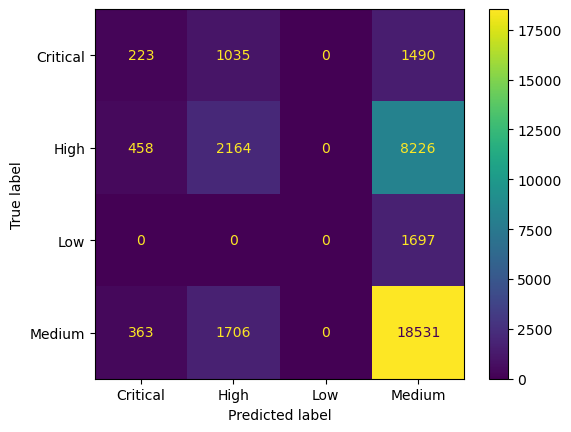

              precision    recall  f1-score   support

    Critical       0.21      0.08      0.12      2748
        High       0.44      0.20      0.27     10848
         Low       0.00      0.00      0.00      1697
      Medium       0.62      0.90      0.73     20600

    accuracy                           0.58     35893
   macro avg       0.32      0.30      0.28     35893
weighted avg       0.50      0.58      0.51     35893


Decision Tree - Test


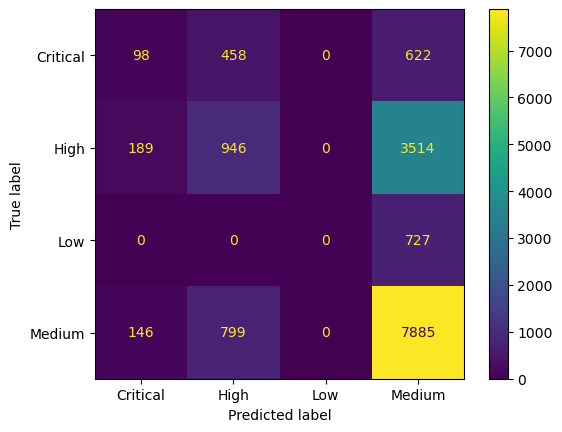

              precision    recall  f1-score   support

    Critical       0.23      0.08      0.12      1178
        High       0.43      0.20      0.28      4649
         Low       0.00      0.00      0.00       727
      Medium       0.62      0.89      0.73      8830

    accuracy                           0.58     15384
   macro avg       0.32      0.29      0.28     15384
weighted avg       0.50      0.58      0.51     15384



In [45]:
# Model Evaluation

print('Decision Tree - Train')
performance_check(model_adaboost, X_train_combined, y_train_encoded, classes)
print('')

print('Decision Tree - Test')
performance_check(model_adaboost, X_test_combined, y_test_encoded, classes)

# Cross Validation 

In [50]:
from sklearn.model_selection import cross_val_score

def cross_val (model):

    recall_train_cross_val = cross_val_score(model,
                                        X_train_combined,
                                        y_train_encoded,
                                        cv=5,
                                        scoring="recall")

    print('----Cross Validation',model,'---- ')
    print('recall Score - All - Cross Validation  : ', recall_train_cross_val)
    print('recall Score - Mean - Cross Validation : ', recall_train_cross_val.mean())
    print('recall Score - Std - Cross Validation  : ', recall_train_cross_val.std())
    print('recall Score - Range of Test-Set       : ', (recall_train_cross_val.mean()-recall_train_cross_val.std()) , '-', (recall_train_cross_val.mean()+recall_train_cross_val.std()))

In [51]:
cross_val(model_knn)

----Cross Validation KNeighborsClassifier() ---- 
recall Score - All - Cross Validation  :  [nan nan nan nan nan]
recall Score - Mean - Cross Validation :  nan
recall Score - Std - Cross Validation  :  nan
recall Score - Range of Test-Set       :  nan - nan
